In [167]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('testresults.csv')
df_master = df


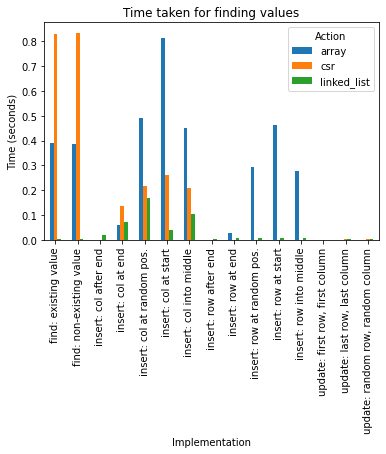

<Figure size 432x288 with 0 Axes>

In [168]:
grouped = df.groupby(['action', 'implementation']).mean()['time']

grouped.unstack().plot(kind='bar')
plt.title('Time taken for finding values')
plt.xlabel('Implementation')
plt.ylabel('Time (seconds)')
plt.legend(title='Action')
plt.show()
plt.savefig(f"graphs/overall mean time.jpg", bbox_inches='tight', dpi=300)



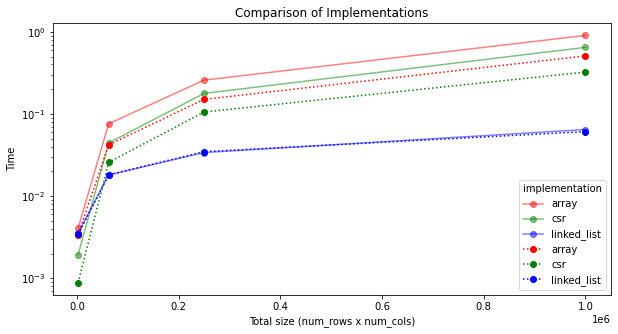

<Figure size 432x288 with 0 Axes>

In [170]:
partial_filled = df[df["filled"] == 0.3]
full = df[df["filled"] == 1.0]

df['size'] = df['num_rows'] * df['num_cols']

# Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
full_table = pd.pivot_table(full, values='time', index='size', columns='implementation')
partial_table = pd.pivot_table(partial_filled, values='time', index='size', columns='implementation')

# Plot the data as a line graph with different colours for each implementation and filled value
fig, ax = plt.subplots(figsize=(10,5))
full_table.plot(ax=ax, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
partial_table.plot(ax=ax, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
plt.xlabel("Total size (num_rows x num_cols)")
plt.ylabel("Time")
plt.title("Comparison of Implementations")
plt.yscale('log')
plt.show()
plt.savefig(f"graphs/overall time line.jpg", bbox_inches='tight', dpi=300)


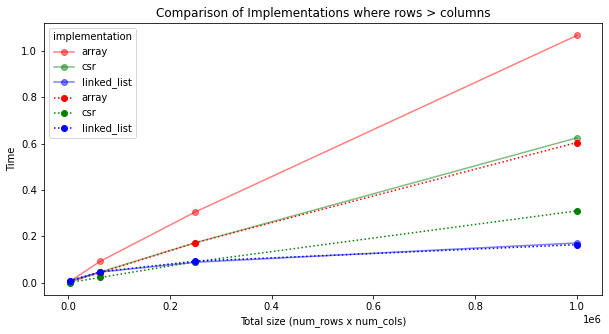

<Figure size 432x288 with 0 Axes>

In [171]:
more_rows_than_cols = df[df['num_rows'] > df['num_cols']]

partial_filled = more_rows_than_cols[more_rows_than_cols["filled"] == 0.3]
full = more_rows_than_cols[more_rows_than_cols["filled"] == 1.0]

df['size'] = df['num_rows'] * df['num_cols']

# Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

# Plot the data as a line graph with different colours for each implementation and filled value
fig, ax = plt.subplots(figsize=(10,5))
full_table.plot(ax=ax, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
partial_table.plot(ax=ax, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
plt.xlabel("Total size (num_rows x num_cols)")
plt.ylabel("Time")
plt.title("Comparison of Implementations where rows > columns")
plt.show()
plt.savefig(f"graphs/moreRowss.jpg", bbox_inches='tight', dpi=300)

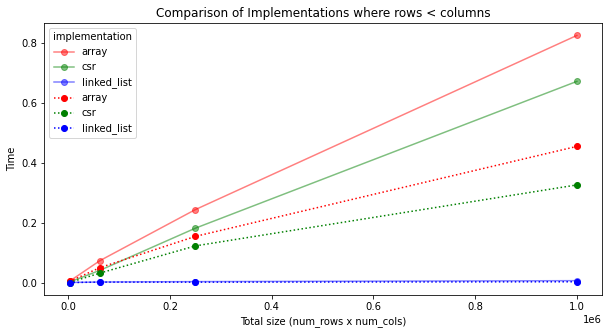

<Figure size 432x288 with 0 Axes>

In [172]:
less_rows_than_cols = df[df['num_rows'] < df['num_cols']]

partial_filled = less_rows_than_cols[less_rows_than_cols["filled"] == 0.3]
full = less_rows_than_cols[less_rows_than_cols["filled"] == 1.0]

df['size'] = df['num_rows'] * df['num_cols']

# Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

# Plot the data as a line graph with different colours for each implementation and filled value
fig, ax = plt.subplots(figsize=(10,5))
full_table.plot(ax=ax, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
partial_table.plot(ax=ax, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
plt.xlabel("Total size (num_rows x num_cols)")
plt.ylabel("Time")
plt.title("Comparison of Implementations where rows < columns")
plt.show()
plt.savefig(f"graphs/moreCols.jpg", bbox_inches='tight', dpi=300)

find existing value
find non-existing value
insert row at start
insert row at end
insert row after end
insert row into middle
insert row at random pos.
insert col at start
insert col at end
insert col after end
insert col into middle
insert col at random pos.
update random row, random column
update first row, first column
update last row, last column


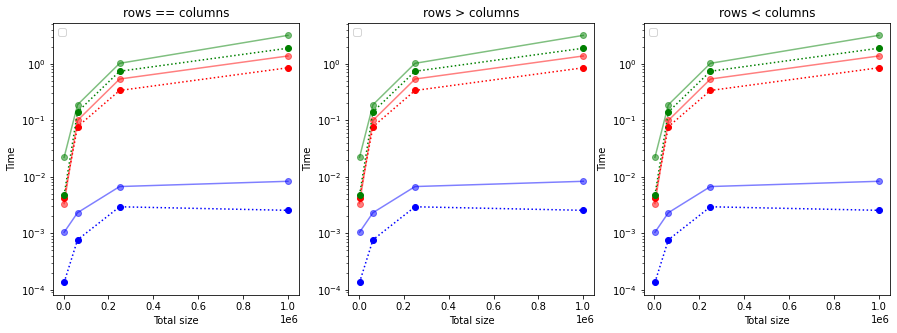

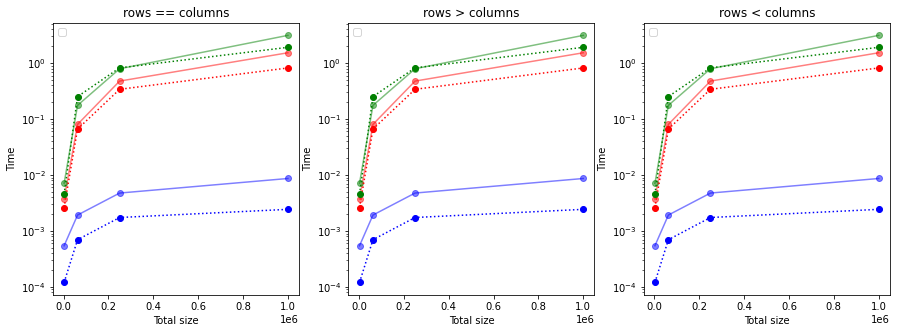

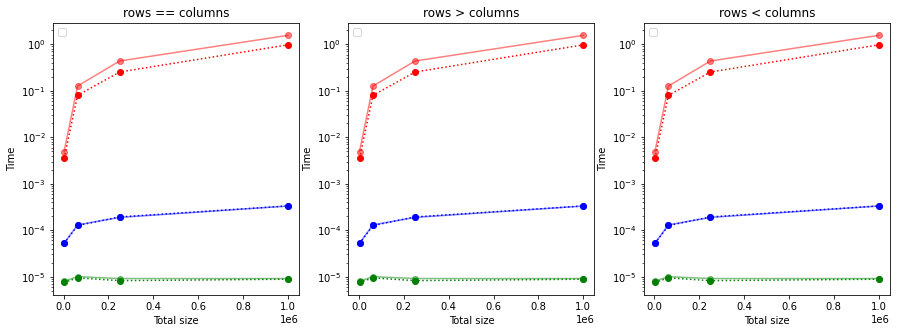

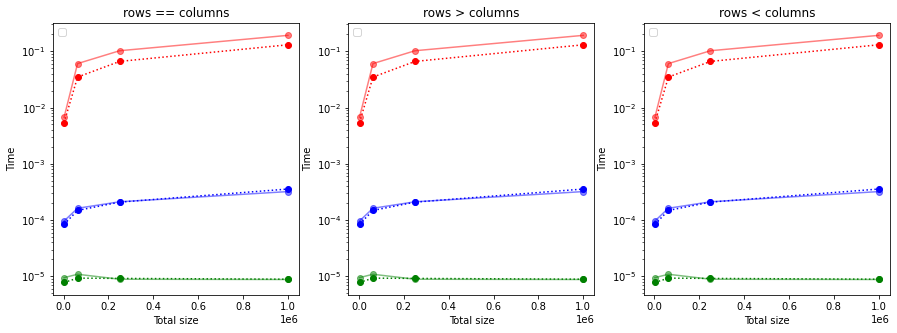

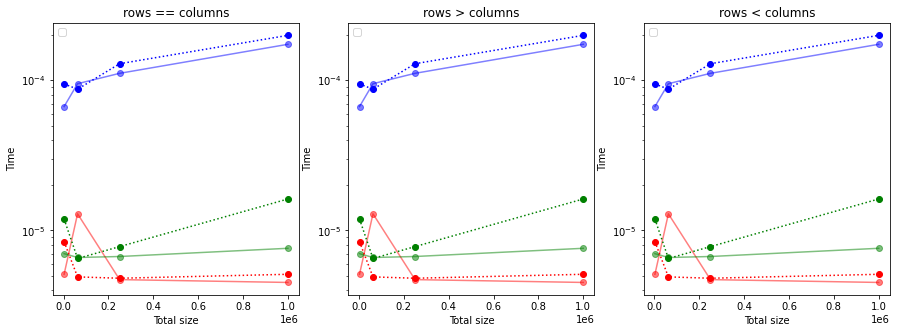

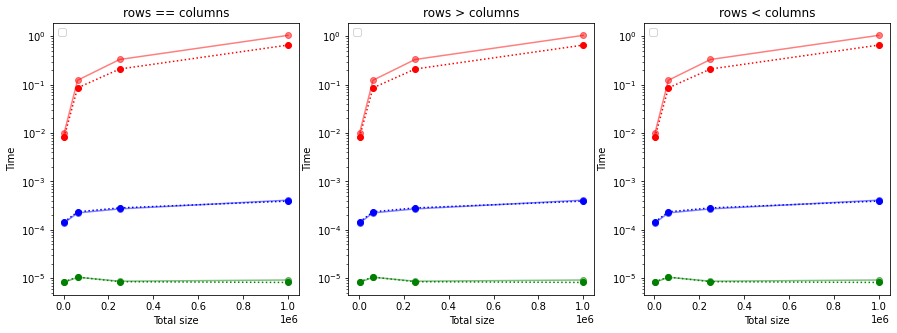

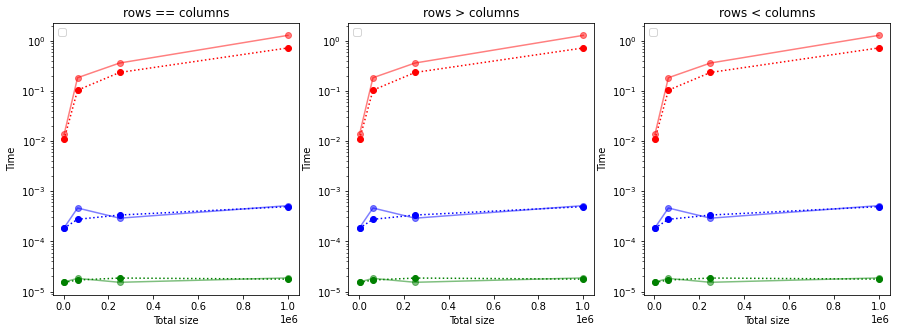

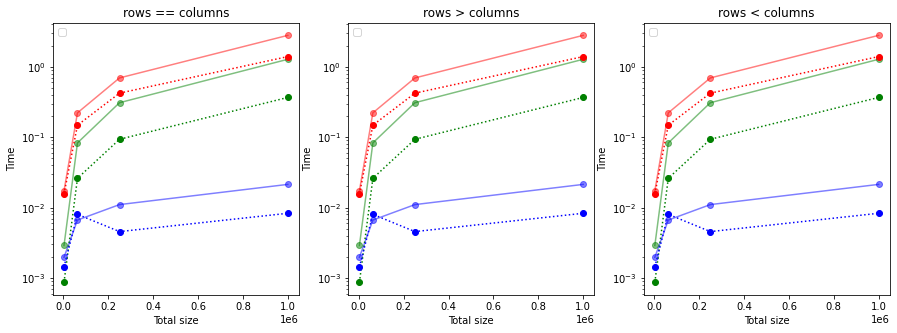

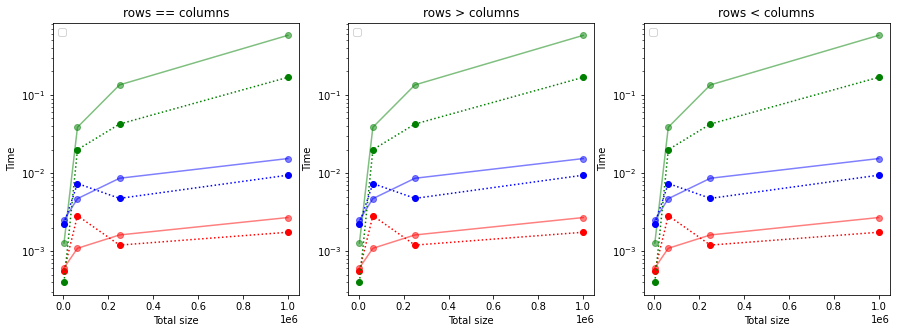

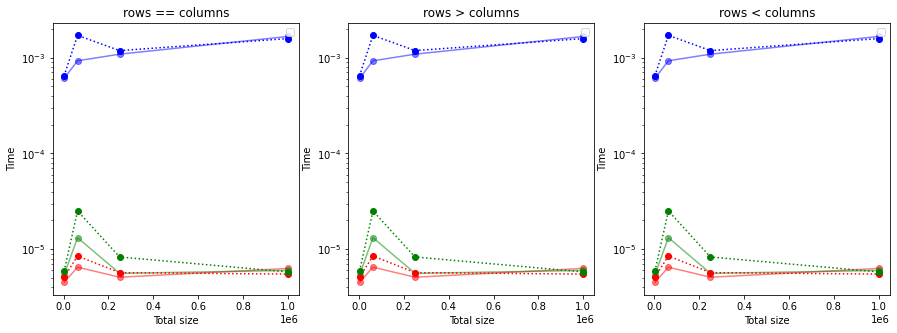

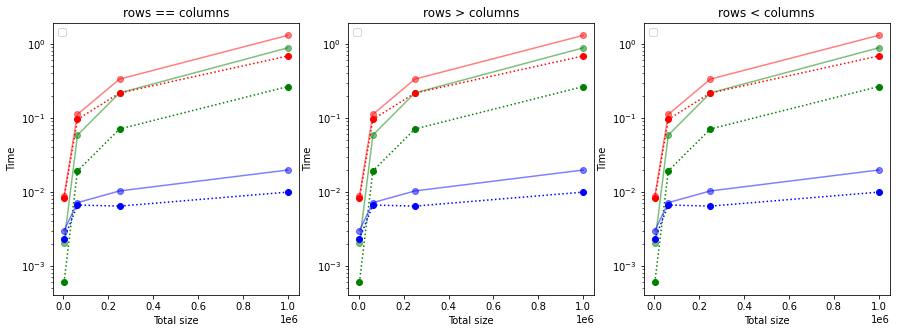

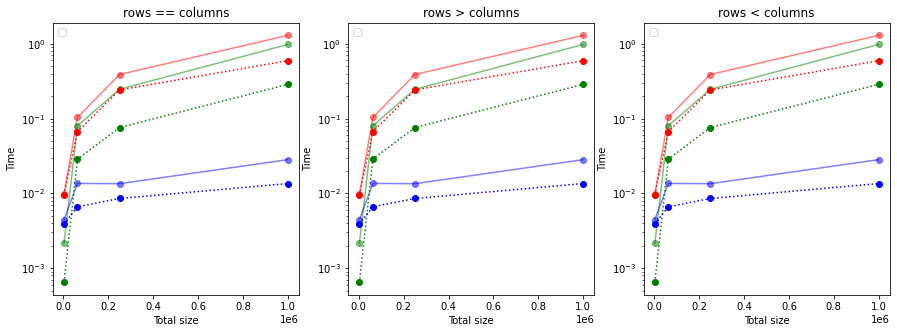

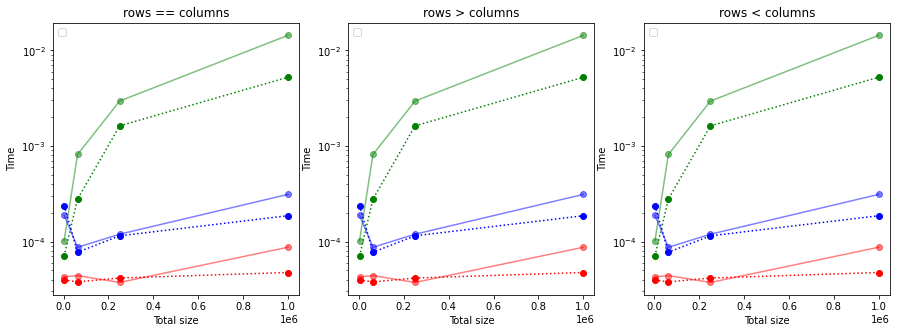

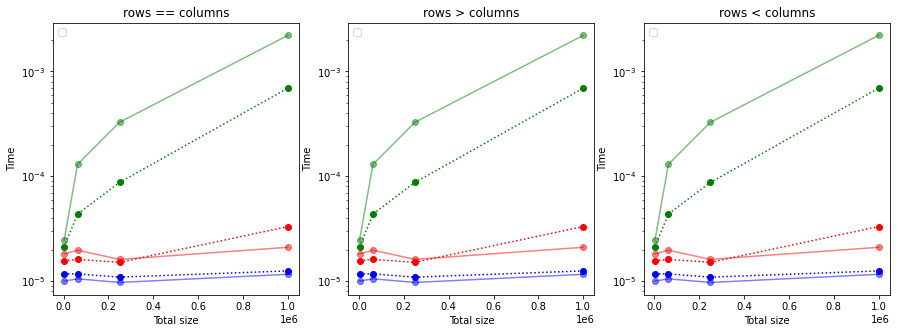

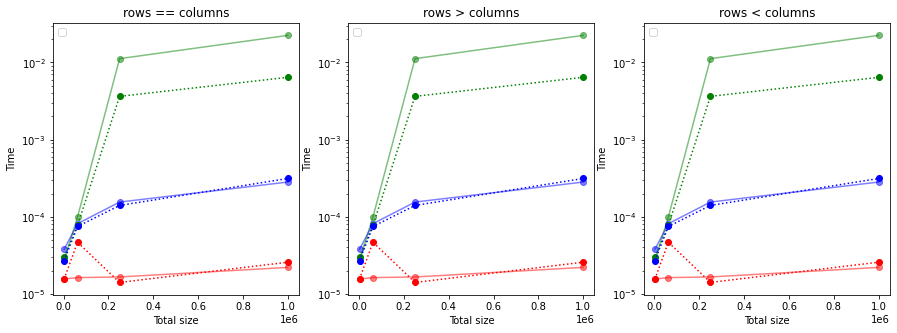

In [173]:
import os

# Get unique values in the action column
unique_actions = df.action.unique()

# Iterate over unique actions
for action in unique_actions:
    # Filter the dataframe for the current action
    current_df = df.loc[df.action == action, :]

    # Plot 1
    same_rows_cols = current_df[current_df['num_rows'] == current_df['num_cols']]
    partial_filled = same_rows_cols[same_rows_cols["filled"] == 0.3]
    full = same_rows_cols[same_rows_cols["filled"] == 1.0]

    # Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
    full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
    partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

    # Create subplot 1
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    ax1 = axs[0]

    # Plot 2
    more_rows_than_cols = current_df[current_df['num_rows'] > current_df['num_cols']]

    partial_filled = more_rows_than_cols[more_rows_than_cols["filled"] == 0.3]
    full = more_rows_than_cols[more_rows_than_cols["filled"] == 1.0]

    # Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
    full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
    partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

    # Create subplot 2
    ax2 = axs[1]

    

    # Plot 3
    less_rows_than_cols = current_df[current_df['num_rows'] < current_df['num_cols']]

    partial_filled = less_rows_than_cols[less_rows_than_cols["filled"] == 0.3]
    full = less_rows_than_cols[less_rows_than_cols["filled"] == 1.0]

    # Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
    full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
    partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

    # Create subplot 3
    ax3 = axs[2]
    
    # Plot the data as a line graph with different colours for each implementation and filled value
    full_table.plot(ax=ax1, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
    partial_table.plot(ax=ax1, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
    ax1.set_xlabel("Total size")
    ax1.set_ylabel("Time")
    ax1.legend([])
    ax1.set_title("rows == columns")
    ax1.set_yscale('log')
    # Plot the data as a line graph with different colours for each implementation and filled value
    full_table.plot(ax=ax2, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
    partial_table.plot(ax=ax2, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
    ax2.set_xlabel("Total size")
    ax2.set_ylabel("Time")
    ax2.legend([])
    ax2.set_title("rows > columns")
    ax2.set_yscale('log')
    # Plot the data as a line graph with different colours for each implementation and filled value
    full_table.plot(ax=ax3, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
    partial_table.plot(ax=ax3, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
    ax3.set_xlabel("Total size")
    ax3.set_ylabel("Time")
    ax3.legend([])
    ax3.set_title("rows < columns")
    ax3.set_yscale('log')

    # Save plot as image file with the name of the current action
    action = action.replace(':','')
    print(action)
    plt.savefig(f"graphs/{action}.jpg", bbox_inches='tight', dpi=300)

